# CPU and Memory Usage Analysis

In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Specify the directory containing the CSV files
directory = '../data/tests/graphs'

# Create an empty list to store the dataframes
dataframes = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        dataframes.append(df)        # Append the DataFrame to the list

# Now, you can work with the list of DataFrames
# For example, to concatenate all DataFrames into one:
df = pd.concat(dataframes, ignore_index=True)
df['capture_number'] = range(1, len(df) + 1)

In [43]:
df.head()

,image_size,processing_time,cpu_usage,memory_usage,image_path,preprocess_time,inference_time,postprocess_time,original_shape,objects_detected,capture_number
0,37280,10.858766,0.227986,0.136726,./data/local/photo_1744644661380_result.tiff,87.353436,1067.273127,216.863745,"(480, 640)",[],1
1,40450,0.944657,0.519000,0.162000,./data/local/photo_1744644675357_result.tiff,19.927884,807.095028,5.590377,"(480, 640)",[],2
2,45170,0.945315,0.540000,0.166000,./data/local/photo_1744644679343_result.tiff,18.890751,806.004632,5.794711,"(480, 640)",[],3
3,72478,0.916433,0.536500,0.166000,./data/local/photo_1744644683329_result.tiff,13.630314,782.695390,5.387463,"(480, 640)",[],4
4,74318,1.147615,0.290000,0.166000,./data/local/photo_1744644687288_result.tiff,13.241301,796.687615,90.240927,"(480, 640)","[('airplane', 0.26792991161346436)]",5


## 1. Line Plot: CPU and Memory Usage Over Processing Time

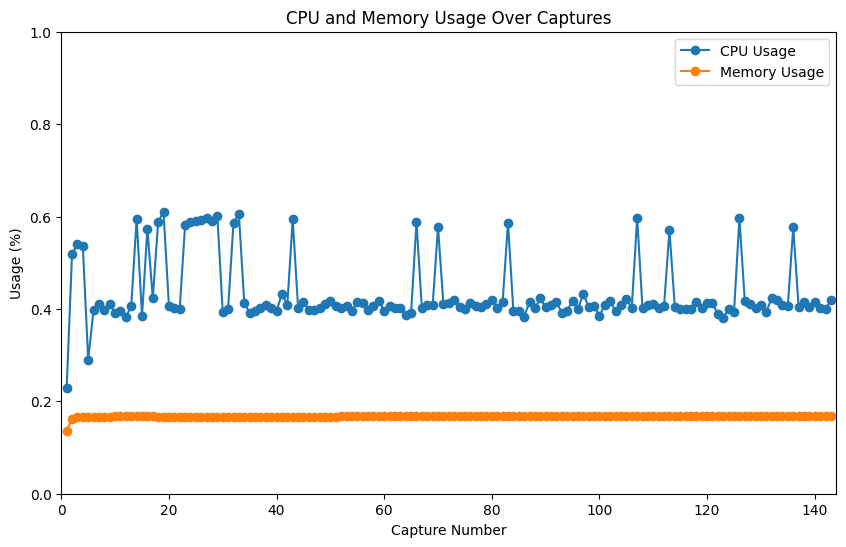

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(df['capture_number'], df['cpu_usage'], label='CPU Usage', marker='o')
plt.plot(df['capture_number'], df['memory_usage'], label='Memory Usage', marker='o')
plt.xlabel('Capture Number')
plt.ylabel('Usage (%)')
plt.title('CPU and Memory Usage Over Captures')
plt.xlim(0, df['capture_number'].max() + 1)  # Add some padding on x-axis
plt.ylim(0, 1)  # Assuming usage percentage is between 0 and 100
plt.legend()
plt.show()

# image_size

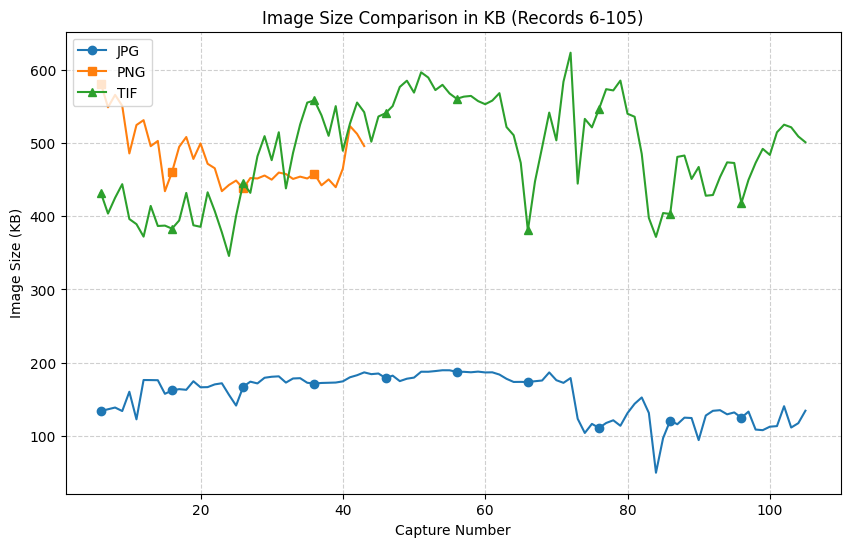

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datasets (ajusta las rutas a tus archivos CSV)
jpg_df = pd.read_csv('../data/tests/resource_usage_1744642881339.csv')
jpg_df['capture_number'] = range(1, len(jpg_df) + 1)

png_df = pd.read_csv('../data/tests/resource_usage_1744643520013.csv')
png_df['capture_number'] = range(1, len(png_df) + 1)

tif_df = pd.read_csv('../data/tests/resource_usage_1744644660126.csv')
tif_df['capture_number'] = range(1, len(tif_df) + 1)

# Filtrar los primeros 100 registros después de los primeros 5 (índices 5 a 105)
jpg_df = jpg_df.iloc[5:105]
png_df = png_df.iloc[5:105]
tif_df = tif_df.iloc[5:105]

# Convertir bytes a KB
jpg_df['image_size_kb'] = jpg_df['image_size'] / 1024
png_df['image_size_kb'] = png_df['image_size'] / 1024
tif_df['image_size_kb'] = tif_df['image_size'] / 1024

# Crear la figura y el eje
fig, ax1 = plt.subplots(figsize=(10, 6))

# Ajuste para espaciar los marcadores
mark_spacing = max(len(jpg_df) // 10, 1)  # Un marcador cada 10% de los datos (mínimo 1)

# Graficar líneas con marcadores espaciados
ax1.plot(jpg_df['capture_number'], jpg_df['image_size_kb'], label='JPG', 
         marker='o', color='tab:blue', linestyle='-', markevery=mark_spacing) 

ax1.plot(png_df['capture_number'], png_df['image_size_kb'], label='PNG', 
         marker='s', color='tab:orange', linestyle='-', markevery=mark_spacing)

ax1.plot(tif_df['capture_number'], tif_df['image_size_kb'], label='TIF', 
         marker='^', color='tab:green', linestyle='-', markevery=mark_spacing)

# Configuración de etiquetas y título
ax1.set_xlabel('Capture Number')
ax1.set_ylabel('Image Size (KB)')  # Ahora en KB
ax1.set_title('Image Size Comparison in KB (Records 6-105)')

# Añadir leyenda y rejilla
ax1.legend(loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()




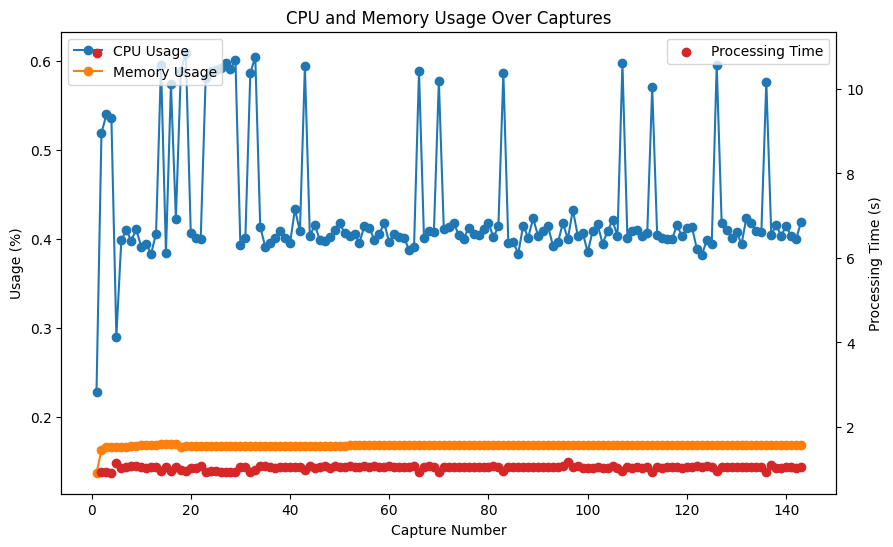

In [45]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df['capture_number'], df['cpu_usage'], label='CPU Usage', marker='o', color='tab:blue')
ax1.plot(df['capture_number'], df['memory_usage'], label='Memory Usage', marker='o', color='tab:orange')
ax1.set_xlabel('Capture Number')
ax1.set_ylabel('Usage (%)')
ax1.set_title('CPU and Memory Usage Over Captures')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.scatter(df['capture_number'], df['processing_time'], color='tab:red', label='Processing Time')
ax2.set_ylabel('Processing Time (s)')
ax2.legend(loc='upper right')

plt.show()

KeyError: 'num_objects_detected'

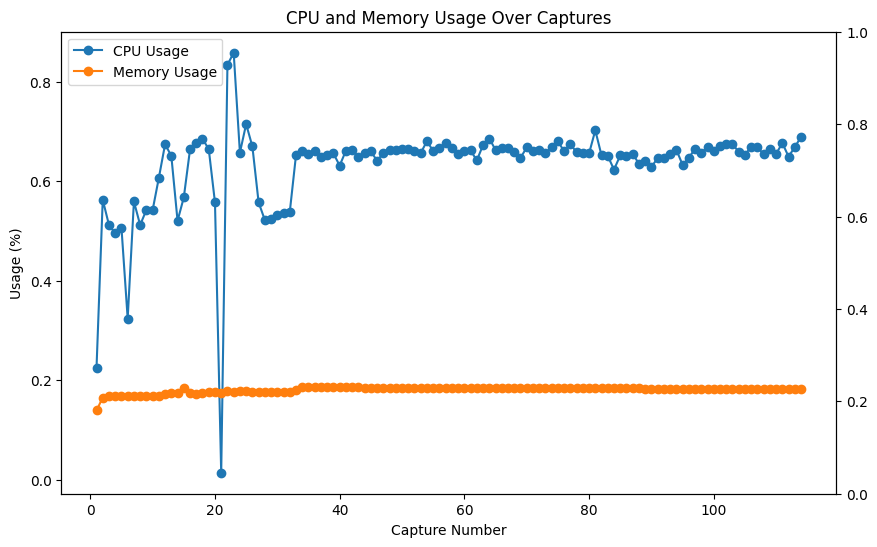

In [32]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df['capture_number'], df['cpu_usage'], label='CPU Usage', marker='o', color='tab:blue')
ax1.plot(df['capture_number'], df['memory_usage'], label='Memory Usage', marker='o', color='tab:orange')
ax1.set_xlabel('Capture Number')
ax1.set_ylabel('Usage (%)')
ax1.set_title('CPU and Memory Usage Over Captures')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.scatter(df['capture_number'], df['num_objects_detected'], color='tab:red', label='Number of Objects Detected')
ax2.set_ylabel('Number of Objects Detected')
ax2.legend(loc='upper right')

plt.show()

## 2. Scatter Plot: CPU and Memory Usage

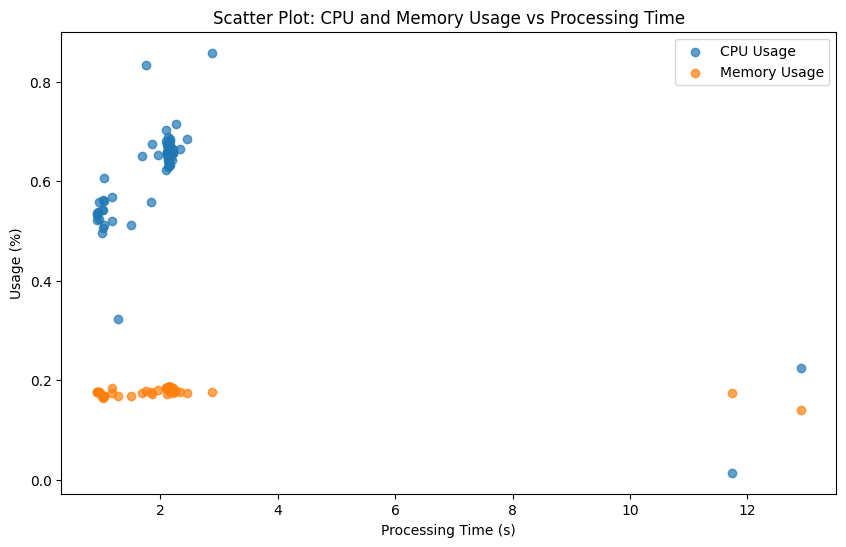

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(df['processing_time'], df['cpu_usage'], label='CPU Usage', alpha=0.7)

plt.scatter(df['processing_time'], df['memory_usage'], label='Memory Usage', alpha=0.7)
plt.ylabel('Usage (%)')
plt.xlabel('Processing Time (s)')
plt.title('Scatter Plot: CPU and Memory Usage vs Processing Time')
plt.legend()
plt.show()

## 3. Histogram: Distribution of CPU and Memory Usage

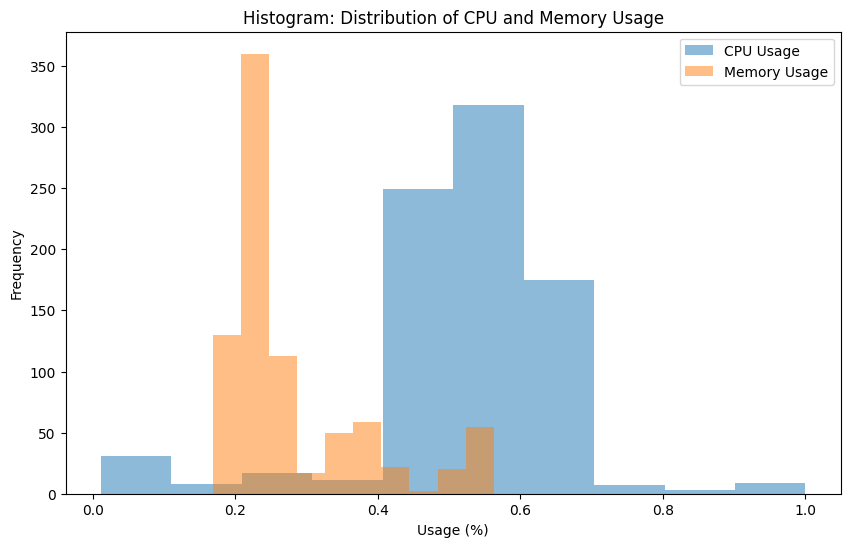

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['cpu_usage'], bins=10, alpha=0.5, label='CPU Usage')
plt.hist(df['memory_usage'], bins=10, alpha=0.5, label='Memory Usage')
plt.xlabel('Usage (%)')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of CPU and Memory Usage')
plt.legend()
plt.show()

## 4. Boxplot: CPU and Memory Usage

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['cpu_usage', 'memory_usage']])
plt.title('Boxplot: CPU and Memory Usage')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

## 5. Stacked Bar Plot: Contribution of Each Stage to Processing Time

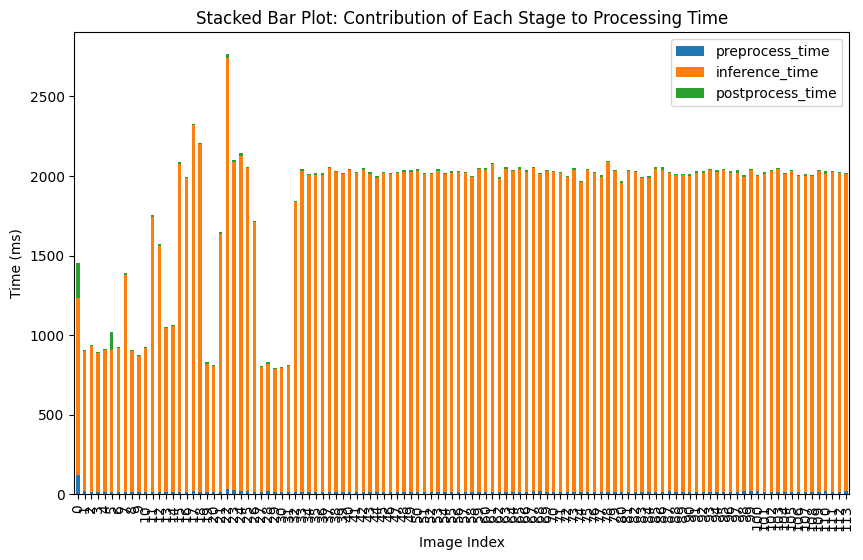

In [35]:
df['total_time'] = df['preprocess_time'] + df['inference_time'] + df['postprocess_time']
df[['preprocess_time', 'inference_time', 'postprocess_time']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Image Index')
plt.ylabel('Time (ms)')
plt.title('Stacked Bar Plot: Contribution of Each Stage to Processing Time')
plt.show()

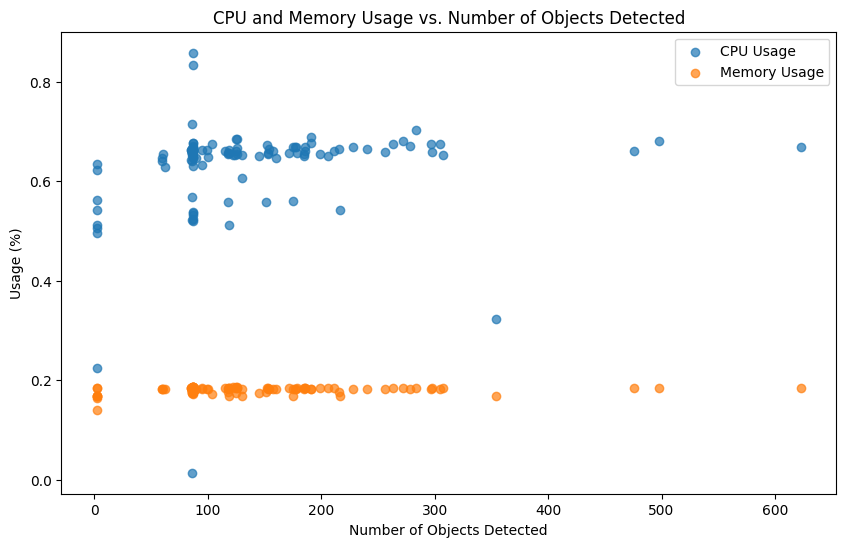

In [36]:
import matplotlib.pyplot as plt

# Calculate the number of objects detected for each row
df['num_objects_detected'] = df['objects_detected'].apply(len)

# Create a scatter plot for CPU and Memory Usage vs. Number of Objects Detected
plt.figure(figsize=(10, 6))
plt.scatter(df['num_objects_detected'], df['cpu_usage'], label='CPU Usage', alpha=0.7)
plt.scatter(df['num_objects_detected'], df['memory_usage'], label='Memory Usage', alpha=0.7)
plt.xlabel('Number of Objects Detected')
plt.ylabel('Usage (%)')
plt.title('CPU and Memory Usage vs. Number of Objects Detected')
plt.legend()
plt.show()

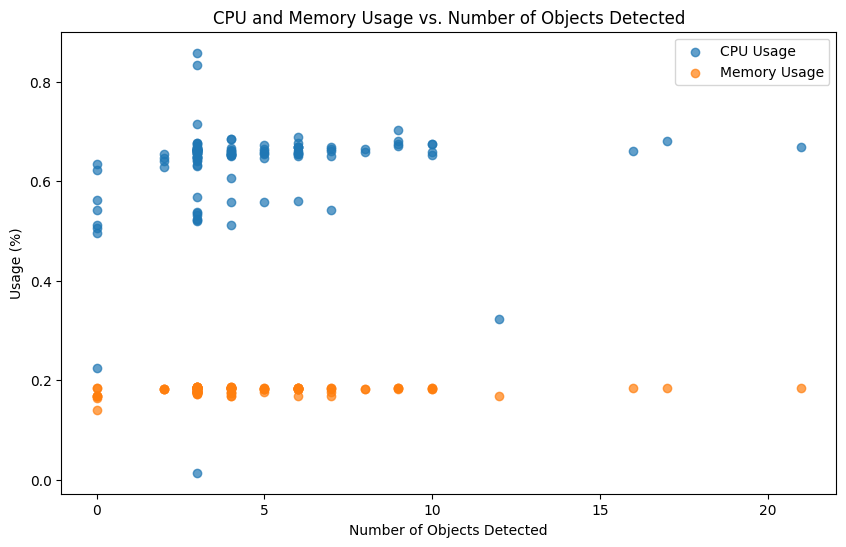

In [37]:
import ast

# Convert the 'objects_detected' column from string to a list (if needed)
df['objects_detected'] = df['objects_detected'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Calculate the number of objects detected for each row
df['num_objects_detected'] = df['objects_detected'].apply(len)

# Create a scatter plot for CPU and Memory Usage vs. Number of Objects Detected
plt.figure(figsize=(10, 6))
plt.scatter(df['num_objects_detected'], df['cpu_usage'], label='CPU Usage', alpha=0.7)
plt.scatter(df['num_objects_detected'], df['memory_usage'], label='Memory Usage', alpha=0.7)
plt.xlabel('Number of Objects Detected')
plt.ylabel('Usage (%)')
plt.title('CPU and Memory Usage vs. Number of Objects Detected')
plt.legend()
plt.show()